# Capstone Project 2: Hospital Readmission — Preprocessing & Model Development

In this notebook, I will be preprocessing the hospital readmission dataset to prepare it for model development. This includes handling categorical variables, standardizing numerical features, and splitting the data into training and testing sets. The target variable is 'readmitted_binary', which indicates whether a patient was readmitted within 30 days.


In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [313]:
#load the data
diabetic_data = pd.read_csv(r"C:\Users\aasha\Downloads\diabetic_data_cleaned.csv")

In [315]:
#Transposing the data
diabetic_data.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,5,15,25,35,45
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
time_in_hospital,1,3,2,2,1
medical_specialty,Pediatrics-Endocrinology,0,0,0,0
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


In [317]:
#checking the rows and columns
diabetic_data.shape

(99493, 44)

In [319]:
#identifying the categorical columns
diabetic_data.select_dtypes(include=['object', 'category'])

,race,gender,medical_specialty,diag_1,diag_2,diag_3,metformin,repaglinide,nateglinide,chlorpropamide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,Pediatrics-Endocrinology,250.83,0,0,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,0,276,250.01,255,No,No,No,No,...,No,Up,No,No,No,No,No,Yes,Yes,>30
2,AfricanAmerican,Female,0,648,250,V27,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,No
3,Caucasian,Male,0,8,250.43,403,No,No,No,No,...,No,Up,No,No,No,No,No,Yes,Yes,No
4,Caucasian,Male,0,197,157,250,No,No,No,No,...,No,Steady,No,No,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,AfricanAmerican,Male,0,250.13,291,458,Steady,No,No,No,...,No,Down,No,No,No,No,No,Yes,Yes,>30
99489,AfricanAmerican,Female,0,560,276,787,No,No,No,No,...,No,Steady,No,No,No,No,No,No,Yes,No
99490,Caucasian,Male,0,38,590,296,Steady,No,No,No,...,No,Down,No,No,No,No,No,Yes,Yes,No
99491,Caucasian,Female,Surgery-General,996,285,998,No,No,No,No,...,No,Up,No,No,No,No,No,Yes,Yes,No


## One-Hot Encoding

A lot of machine learning algorithms cannot handle categorical variables directly. Hence, I will be using one-hot encoding to convert categorical columns like 'race' , 'gender', and 'medical specialty' into numerical indicators.


In [322]:
# Convert categorical variables into dummy variables to enable machine learning models to interpret them.
diabetic_data_dummies = pd.get_dummies(diabetic_data, drop_first=True)

In [324]:
#checking the top 5 rows of the dataset
diabetic_data_dummies.head()

,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_Yes,diabetesMed_Yes,readmitted_>30,readmitted_No
0,5,6,25,1,41,0,1,0,0,0,...,True,False,False,False,False,False,False,False,False,True
1,15,1,1,3,59,0,18,0,0,0,...,True,False,False,False,False,False,True,True,True,False
2,25,1,1,2,11,5,13,2,0,1,...,True,False,False,False,False,False,False,True,False,True
3,35,1,1,2,44,1,16,0,0,0,...,True,False,False,False,False,False,True,True,False,True
4,45,1,1,1,51,0,8,0,0,0,...,True,False,False,False,False,False,True,True,False,True


In [326]:
#identifying the numeric columns
numeric_cols = diabetic_data_dummies.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [328]:
#incase our targeted column is numeric
numeric_cols = [col for col in numeric_cols if col != 'readmitted']

In [330]:
diabetic_data_dummies[numeric_cols].head()

,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary
0,5,6,25,1,41,0,1,0,0,0,1,0
1,15,1,1,3,59,0,18,0,0,0,9,0
2,25,1,1,2,11,5,13,2,0,1,6,0
3,35,1,1,2,44,1,16,0,0,0,7,0
4,45,1,1,1,51,0,8,0,0,0,5,0


In [332]:
# Defining feature set X by dropping the target column 'readmitted_binary'
X = diabetic_data_dummies.drop('readmitted_binary', axis=1)
# Defining target variable y as the binary classification of readmission (where 0 = No/ >30 days, 1 = <30 days)
y = diabetic_data_dummies['readmitted_binary']

## Target Distribution
To understand the balance between the readmitted and non-readmitted patients, I will be plotting the distribution of the 'readmitted binary' target variable.


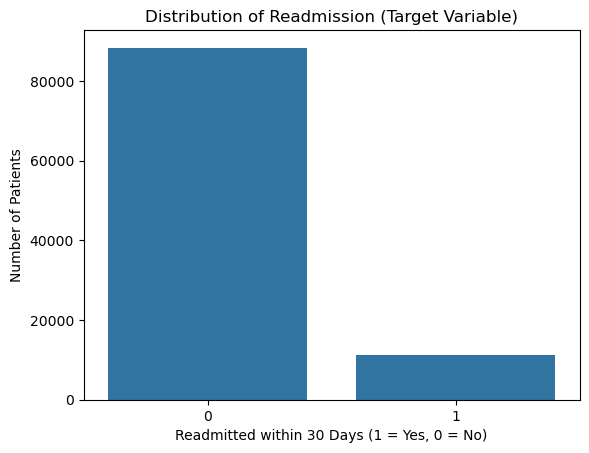

In [341]:
sns.countplot(x='readmitted_binary', data=diabetic_data_dummies)
plt.title('Distribution of Readmission (Target Variable)')
plt.xlabel('Readmitted within 30 Days (1 = Yes, 0 = No)')
plt.ylabel('Number of Patients')
plt.show()

## Feature Scaling

To make sure that all the numeric features contribute equally to the model, I will be applying standardization using 'StandardScaler'. This is particularly helpful for algorithms like SVM, KNN, and Logistic Regression.

I will first see the feature distribution, then select numeric columns and then finally apply scaling.


Text(0.5, 1.0, 'Before Scaling: num_medications')

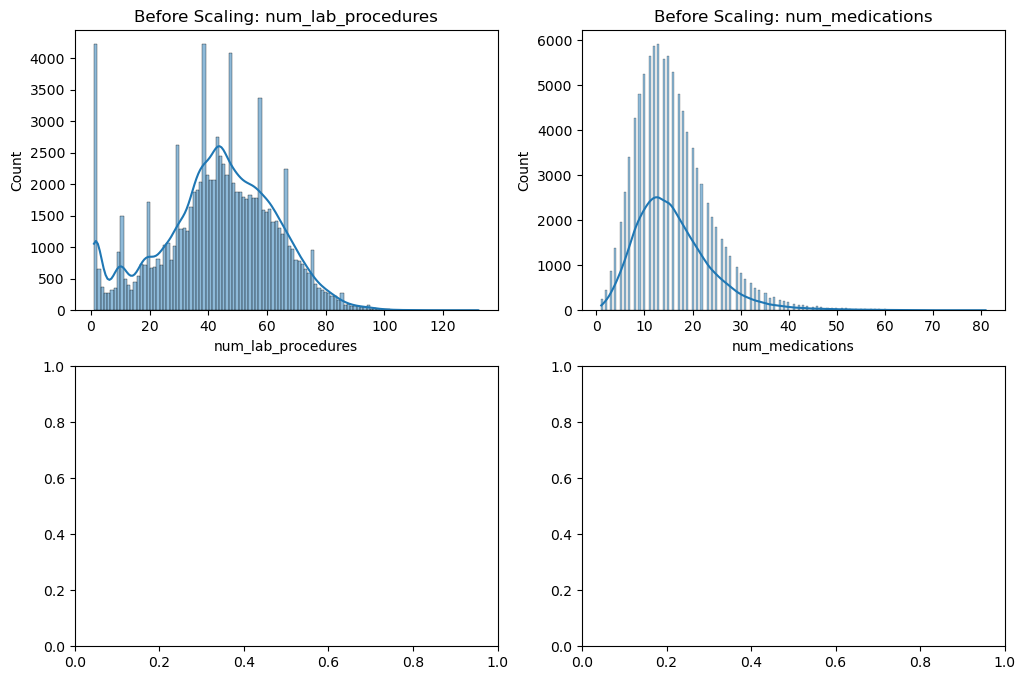

In [345]:
#feature distribution before scaling
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(X['num_lab_procedures'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Before Scaling: num_lab_procedures')

sns.histplot(X['num_medications'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Before Scaling: num_medications')

In [293]:
# Select numeric columns for scaling (excluding the target)
numeric_cols = X.select_dtypes(include=[np.number]).columns

#
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [296]:
#sanity check after scaling
diabetic_data_dummies[numeric_cols].describe().T[['mean', 'std']]

,mean,std
age,65.955344,15.943660
admission_type_id,2.027248,1.450857
discharge_disposition_id,3.740856,5.309393
time_in_hospital,4.398420,2.986977
num_lab_procedures,43.072588,19.695858
num_procedures,1.340577,1.703717
num_medications,16.026605,8.119790
number_outpatient,0.373353,1.276799
number_emergency,0.201341,0.939977
number_inpatient,0.643101,1.271365


In [298]:
# Confirm scaling worked: mean ~ 0, std ~ 1
scaled_means = X_scaled[numeric_cols].mean()
scaled_stds = X_scaled[numeric_cols].std()

print("Means after scaling:\n", scaled_means)
print("\nStandard deviations after scaling:\n", scaled_stds)


Means after scaling:
 age                        -2.185340e-16
admission_type_id           1.828259e-17
discharge_disposition_id   -2.856654e-18
time_in_hospital           -9.027027e-17
num_lab_procedures          9.284126e-17
num_procedures              1.542593e-17
num_medications             1.384049e-16
number_outpatient           2.399590e-17
number_emergency           -2.028224e-17
number_inpatient           -4.699196e-17
number_diagnoses           -2.125351e-16
dtype: float64

Standard deviations after scaling:
 age                         1.000005
admission_type_id           1.000005
discharge_disposition_id    1.000005
time_in_hospital            1.000005
num_lab_procedures          1.000005
num_procedures              1.000005
num_medications             1.000005
number_outpatient           1.000005
number_emergency            1.000005
number_inpatient            1.000005
number_diagnoses            1.000005
dtype: float64


## Distribution of Scaled Features

After standardizing the numeric features, I visualize the distributions to confirm they are centered around 0 with unit variance.


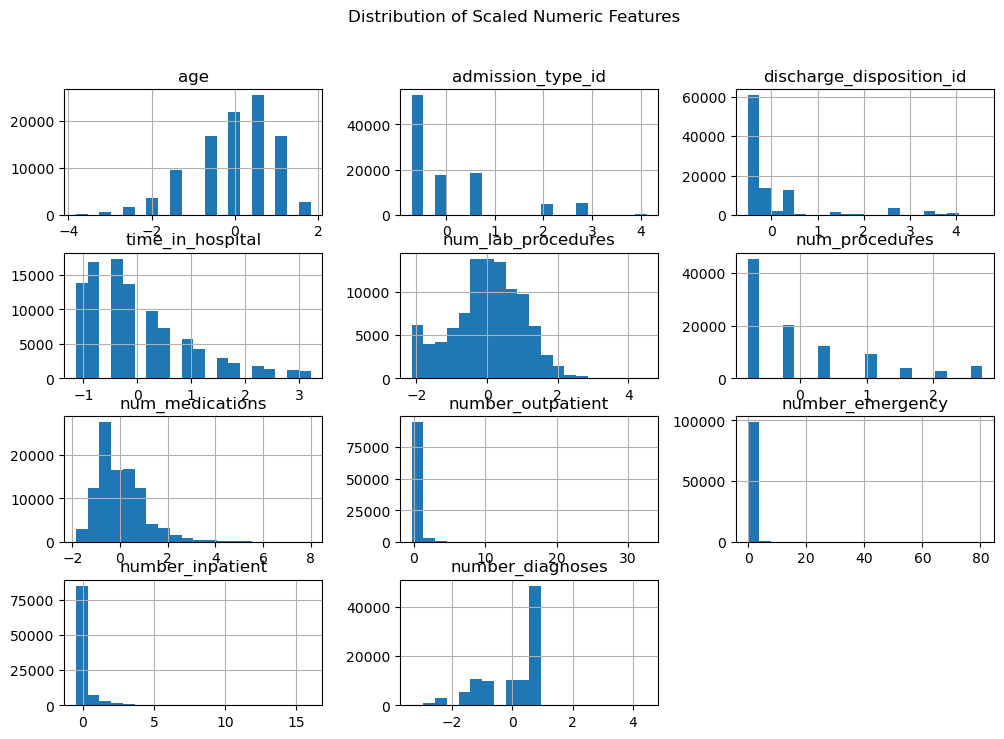

In [301]:
X_scaled[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Scaled Numeric Features')
plt.show()

## Train-Test Split

I split the preprocessed data into training and testing subsets using an 80-20 ratio to train models on one part of the data and evaluate performance on unseen data.


In [304]:
# Split the dataset into training and test sets (80/20) to evaluate model performance on unseen data.
# Stratify on target to preserve class distribution.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [306]:
diabetic_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,5,6,25,1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,15,1,1,3,0,59,0,18,...,Up,No,No,No,No,No,Yes,Yes,>30,0
2,AfricanAmerican,Female,25,1,1,2,0,11,5,13,...,No,No,No,No,No,No,No,Yes,No,0
3,Caucasian,Male,35,1,1,2,0,44,1,16,...,Up,No,No,No,No,No,Yes,Yes,No,0
4,Caucasian,Male,45,1,1,1,0,51,0,8,...,Steady,No,No,No,No,No,Yes,Yes,No,0


## Summary

In this notebook, I prepared the hospital dataset for machine learning by:

- One-hot encoding categorical variables
- Standardizing numeric features
- Splitting data into training and testing sets

These steps ensure the data is clean and appropriately structured for building predictive models in the next phase.
